In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
# Compare state_flag
run1 = RunManager('StatArbStrategy', 'run_0105')
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,104,0.836548,0.066874,-999.0
1,holding_period,5,104,0.851946,0.070639,-999.0
2,holding_period,7,104,0.813413,0.069478,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",156,0.935644,0.079218,-999.0
4,model,{u'type': u'reg'},156,0.732294,0.058775,-999.0
5,per_side_count,10,156,0.941327,0.068807,-999.0
6,per_side_count,20,156,0.726611,0.069187,-999.0
7,response_days,5,312,0.833969,0.068997,-999.0
8,response_type,Simple,312,0.833969,0.068997,-999.0
9,score_var,boll2_40,24,0.746139,0.080604,-999.0


In [4]:
# Current drops for production environment
drop_params = [('model', "{u'type': u'reg'}"), ('score_var', 'prma_20'), ('state_flag', True)]
runA = RunManager('StatArbStrategy', 'run_0105', drop_params=drop_params)

drop_params = [('model', "{u'type': u'reg'}"), ('score_var', 'prma_20'), ('state_flag', False)]
runB = RunManager('StatArbStrategy', 'run_0105', drop_params=drop_params)

In [5]:
combA = CombinationSearch()
combA.set_selection_criteria('sharpe')
combA.params['training_epochs'] = 5
combA.add_run(runA)
combA.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:49<00:00,  9.76s/it]


In [6]:
combB = CombinationSearch()
combB.set_selection_criteria('sharpe')
combB.params['training_epochs'] = 5
combB.add_run(runB)
combB.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:48<00:00,  9.96s/it]


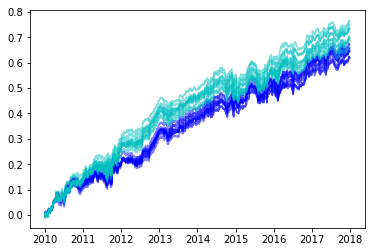

In [7]:
plt.figure()
plt.plot(combA.best_results_returns.dropna().cumsum(), 'b', alpha=0.5)
plt.plot(combB.best_results_returns.dropna().cumsum(), 'c', alpha=0.5)
plt.show()

In [8]:
get_stats(combA.best_results_returns.dropna()).mean(axis=1)

Total               0.64493
Mean                0.00030
Std                 0.00385
Skew                0.25327
Kurt                2.18900
Sharpe              1.32317
Sortino             2.38132
MinRet             -0.01636
WinP                0.52879
DD%                -0.05790
DDDays            131.60000
UnderwaterDays    149.90000
Underwater%        -0.04935
TimeAtHighs         0.13650
VaR_5perc          -0.00576
CVaR_5perc         -0.00810
LPM_2               0.00614
dtype: float64

In [9]:
get_stats(combB.best_results_returns.dropna()).mean(axis=1)

Total               0.71412
Mean                0.00035
Std                 0.00397
Skew                0.31512
Kurt                3.28700
Sharpe              1.41512
Sortino             2.55426
MinRet             -0.02094
WinP                0.53736
DD%                -0.06996
DDDays            151.90000
UnderwaterDays    164.20000
Underwater%        -0.05928
TimeAtHighs         0.14590
VaR_5perc          -0.00578
CVaR_5perc         -0.00835
LPM_2               0.00648
dtype: float64

In [10]:
dfA = rollup_returns(combA.best_results_returns.dropna())
dfA['yr'] = dfA.sum(axis=1)
dfA

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.049263,0.009431,0.077358,-0.021891,0.114161
2011,0.033031,0.014242,-0.027446,0.067652,0.087480
2012,0.014262,-0.001652,0.026661,0.077035,0.116305
2013,-0.024015,0.034900,0.021762,0.019000,0.051648
2014,0.033913,0.006318,-0.011112,0.019004,0.048123
2015,0.010352,0.052240,-0.030928,0.038930,0.070594
2016,0.026895,-0.018770,0.017908,0.042583,0.068616
2017,0.009283,0.039356,-0.000674,0.012400,0.060365


In [11]:
dfB = rollup_returns(combB.best_results_returns.dropna())
dfB['yr'] = dfB.sum(axis=1)
dfB

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.052399,0.011607,0.068854,0.015337,0.148197
2011,0.034706,0.023945,-0.032344,0.086746,0.113053
2012,0.027305,0.005222,0.034853,0.071965,0.139345
2013,-0.025182,0.029867,0.035046,0.010529,0.050260
2014,0.032791,0.019460,-0.013308,0.005526,0.044470
2015,-0.006605,0.053530,-0.039379,0.057132,0.064678
2016,0.041694,-0.027743,-0.004663,0.042498,0.051785
2017,0.015298,0.044665,-0.012395,0.028272,0.075840
